In [1]:
import logging

logging.basicConfig(level=logging.DEBUG)

In [1]:
import yfinance as yf
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, TrendLine, SameAxes
from mplchart.indicators import RSI, RSIDIV
from auto_chart_patterns.trendline_patterns import TrendLineProperties
from auto_chart_patterns.rsi_div_patterns import RsiDivergenceProperties

ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="1y")

In [2]:
import pandas as pd
df = prices.copy()
# add row number from 1 to len(df)
df['row_number'] = pd.RangeIndex(len(df))
# make row number an integer
#df['row_number'] = df['row_number'].astype(int)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,row_number
Date,,,,,,,,
2023-11-27 00:00:00-05:00,188.994117,189.740461,187.979086,188.864746,40552600,0.0,0.0,0
2023-11-28 00:00:00-05:00,188.854799,190.148464,188.476646,189.471771,38415400,0.0,0.0,1
2023-11-29 00:00:00-05:00,189.969332,191.153533,188.048749,188.446793,43014200,0.0,0.0,2
2023-11-30 00:00:00-05:00,188.914492,189.392163,187.272542,189.023956,48794400,0.0,0.0,3
2023-12-01 00:00:00-05:00,189.402111,190.626110,188.307468,190.307678,45679300,0.0,0.0,4


In [3]:
df['row_number'].dtype


dtype('int64')

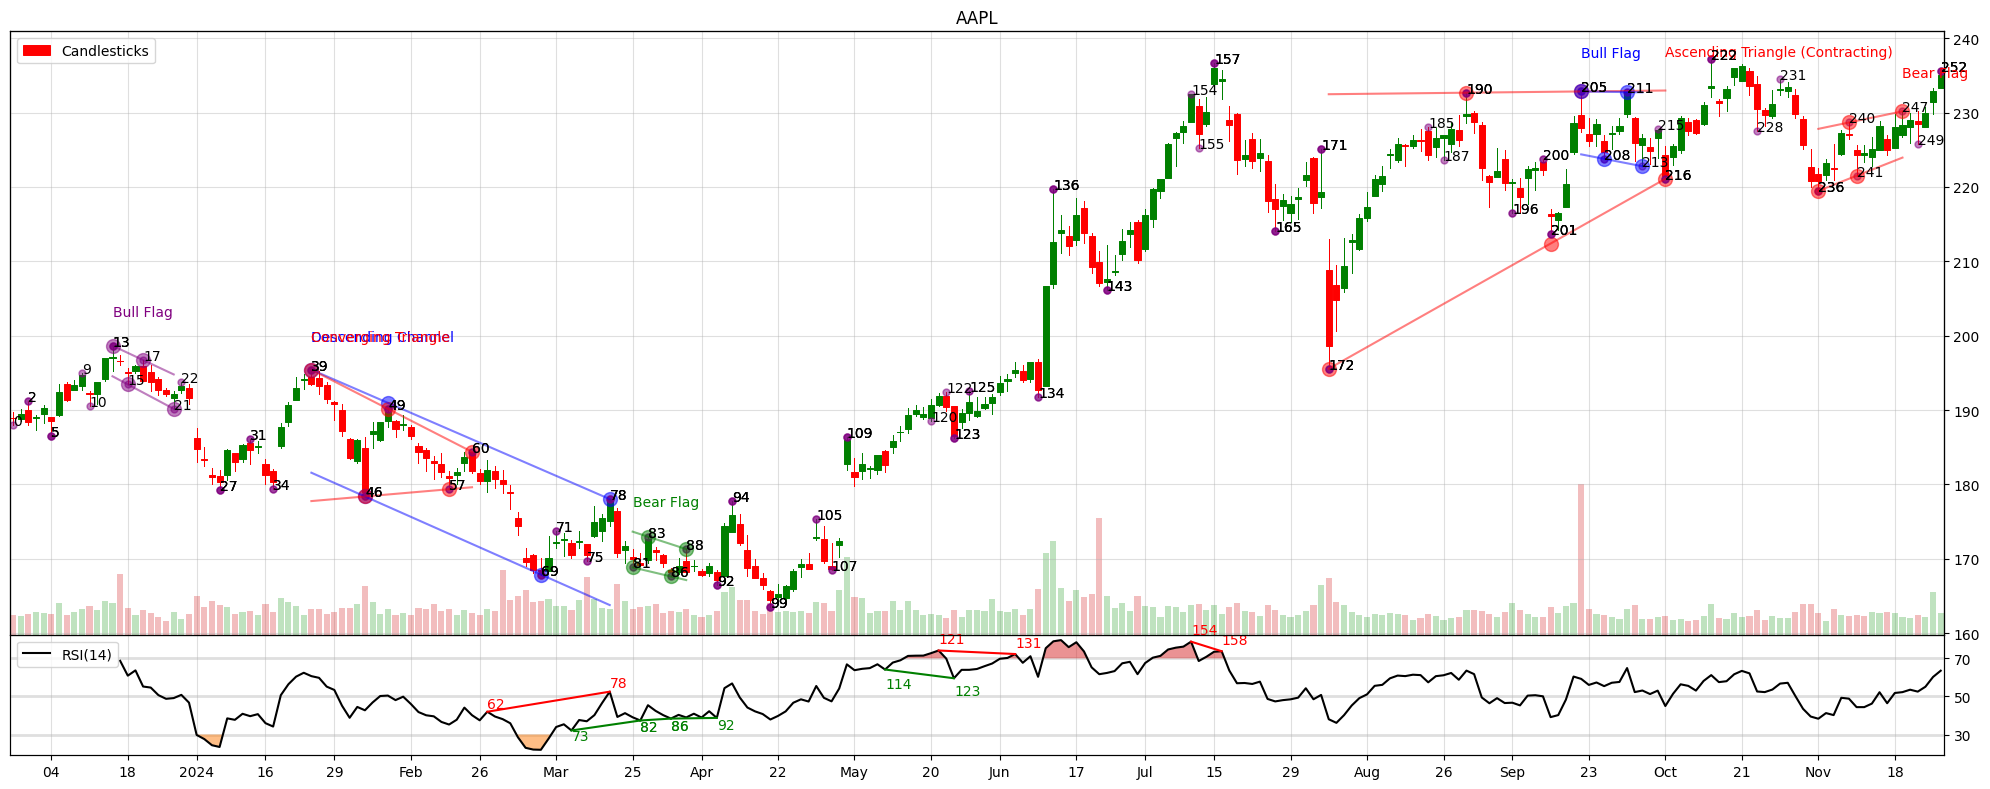

In [2]:
# Configure pattern scanning
scan_props = TrendLineProperties(
        number_of_pivots=5,
        flat_ratio=0.05,
        #align_ratio=0.2,
    )

scan_props_pf = TrendLineProperties(
        number_of_pivots=4,
)

scan_props_rsi = RsiDivergenceProperties(
    min_change_pct=0.005,
)

indicators = [
    Candlesticks(colorup="green", colordn="red"),
    Volume(),
    TrendLine(backcandles=5, forwardcandles=5, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandles=3, forwardcandles=3, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandles=2, forwardcandles=2, pivot_limit=100, show_pivots=True, scan_props=scan_props_pf),
    RSI(),
    RSIDIV(backcandles=2, forwardcandles=2, show_pivots=True, scan_props=scan_props_rsi) | SameAxes(),
    # SMA(50),
    # SMA(200),
    # MACD(),
]

chart = Chart(title=ticker, figsize=(20, 8), max_ticks=90)
chart.plot(prices, indicators)

